In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv(r"data\ObesityDataSet_cleaned_and_data_sinthetic.csv")

print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2111 non-null   object 
 1   Gender                          2111 non-null   object 
 2   Age                             2111 non-null   int64  
 3   Height                          2111 non-null   float64
 4   Weight                          2111 non-null   int64  
 5   family_history_with_overweight  2111 non-null   object 
 6   FAVC                            2111 non-null   object 
 7   FCVC                            2111 non-null   object 
 8   NCP                             2111 non-null   int64  
 9   CAEC                            2111 non-null   object 
 10  SMOKE                           2111 non-null   object 
 11  CH2O                            2111 non-null   object 
 12  SCC                             21

In [114]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['NCP'] = scaler.fit_transform(df[['NCP']])
print(df['NCP'].describe())

count    2111.000000
mean        0.562609
std         0.269893
min         0.000000
25%         0.666667
50%         0.666667
75%         0.666667
max         1.000000
Name: NCP, dtype: float64


In [115]:
ncp_min = df['NCP'].min()
ncp_max = df['NCP'].max()

df['NCP_scaled'] = (df['NCP'] - ncp_min) / (ncp_max - ncp_min)
print(df[['NCP', 'NCP_scaled']].head())
print(df['NCP_scaled'].describe())

        NCP  NCP_scaled
0  0.666667    0.666667
1  0.666667    0.666667
2  0.666667    0.666667
3  0.666667    0.666667
4  0.000000    0.000000
count    2111.000000
mean        0.562609
std         0.269893
min         0.000000
25%         0.666667
50%         0.666667
75%         0.666667
max         1.000000
Name: NCP_scaled, dtype: float64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2111 non-null   object 
 1   Gender                          2111 non-null   object 
 2   Age                             2111 non-null   int64  
 3   Height                          2111 non-null   float64
 4   Weight                          2111 non-null   int64  
 5   family_history_with_overweight  2111 non-null   object 
 6   FAVC                            2111 non-null   object 
 7   FCVC                            2111 non-null   object 
 8   NCP                             2111 non-null   float64
 9   CAEC                            2111 non-null   object 
 10  SMOKE                           2111 non-null   object 
 11  CH2O                            2111 non-null   object 
 12  SCC                             21

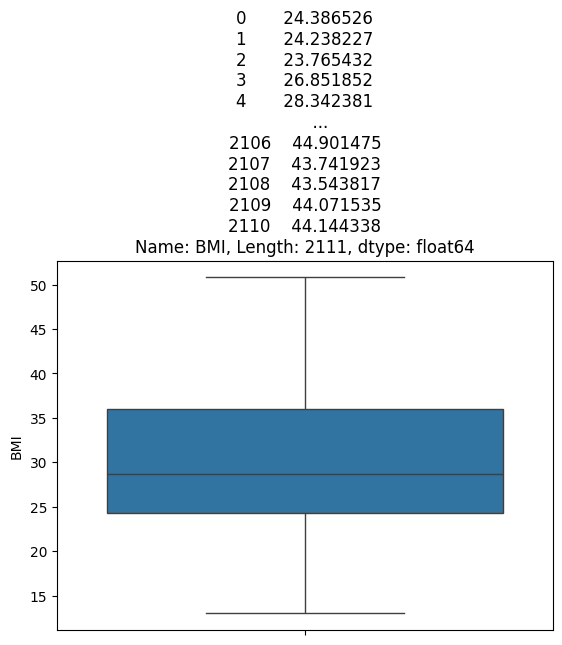

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(df.info())
print(df.describe())

missing_values = df.isnull().sum()
print(f"결측치:\n", missing_values)

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df[col] = df[col].clip(lower_bound, upper_bound)

    print(f"{col} 처리 완료: 하한 {lower_bound}, 상한 {upper_bound}")

sns.boxplot(df['BMI'])
plt.title(df['BMI'])
plt.show()

In [117]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns", categorical_columns)
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")

Categorical columns Index(['id', 'Gender', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'NObeyesdad'],
      dtype='object')
id: 2111 unique values
Gender: 2 unique values
family_history_with_overweight: 2 unique values
FAVC: 2 unique values
FCVC: 3 unique values
CAEC: 4 unique values
SMOKE: 2 unique values
CH2O: 3 unique values
SCC: 2 unique values
FAF: 4 unique values
TUE: 3 unique values
CALC: 4 unique values
MTRANS: 5 unique values
NObeyesdad: 7 unique values


In [118]:
print(df['FAF'].unique())
print(df['TUE'].unique())

df['FAF'] = df['FAF'].replace({'0':0, '4 to 5':4.5, '2 to 4':3, '1 to 2':1.5}).astype(float)
df['TUE'] = df['TUE'].replace({'3 to 5':4.5, '0 to 2':1, '>5':6}).astype(float)

print(df['FAF'].unique())
print(df['TUE'].unique())

['0' '4 to 5' '2 to 4' '1 to 2']
['3 to 5' '0 to 2' '>5']
[0.  4.5 3.  1.5]
[4.5 1.  6. ]


C:\Users\USER\AppData\Local\Temp\ipykernel_18360\4293220191.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FAF'] = df['FAF'].replace({'0':0, '4 to 5':4.5, '2 to 4':3, '1 to 2':1.5}).astype(float)
C:\Users\USER\AppData\Local\Temp\ipykernel_18360\4293220191.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['TUE'] = df['TUE'].replace({'3 to 5':4.5, '0 to 2':1, '>5':6}).astype(float)


In [119]:
categorical_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(categorical_columns)
print(numeric_columns)

Index(['id', 'Gender', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'CAEC', 'SMOKE', 'CH2O', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
Index(['Age', 'Height', 'Weight', 'NCP', 'FAF', 'TUE', 'BMI', 'NCP_scaled'], dtype='object')


In [120]:
# 'Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'CALC', 'MTRANS'
# 'Age', 'Height', 'Weight', 'NCP', 'FAF', 'TUE', 'BMI'

In [121]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

label_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'CALC', 'MTRANS']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders = le

print(df[label_cols].head())

scaler = MinMaxScaler()
scale_cols = ['Age', 'Height', 'Weight', 'NCP', 'FAF', 'TUE', 'BMI']
df[scale_cols] = scaler.fit_transform(df[scale_cols])

print(df[scale_cols].describe())

   Gender  family_history_with_overweight  FAVC  FCVC  CAEC  SMOKE  CH2O  SCC  \
0       0                               1     0     2     3      0     0    0   
1       0                               1     0     0     3      1     2    1   
2       1                               1     0     2     3      0     0    0   
3       1                               0     0     0     3      0     0    0   
4       1                               0     0     2     3      0     0    0   

   CALC  MTRANS  
0     2       3  
1     3       3  
2     1       3  
3     1       4  
4     3       3  
               Age       Height       Weight     NCP          FAF  \
count  2111.000000  2111.000000  2111.000000  2111.0  2111.000000   
mean      0.471747     0.478325     0.365352     0.0     0.335544   
std       0.251179     0.177321     0.201020     0.0     0.298487   
min       0.000000     0.000000     0.000000     0.0     0.000000   
25%       0.285714     0.342101     0.203455     0.0     0.0

In [122]:
# 파생변수 생성
df['family_history_with_overweight'] = df['family_history_with_overweight'].astype(float)
df['ARI'] = (df['BMI'] * (1 + 0.5 * df['family_history_with_overweight'])) / (1 + df['FAF'])

# 결과 확인
print(df[['BMI', 'family_history_with_overweight', 'FAF', 'ARI']].head())

        BMI  family_history_with_overweight       FAF       ARI
0  0.301162                             1.0  0.000000  0.451742
1  0.297240                             1.0  1.000000  0.222930
2  0.284736                             1.0  0.666667  0.256263
3  0.366359                             0.0  0.666667  0.219816
4  0.405778                             0.0  0.000000  0.405778


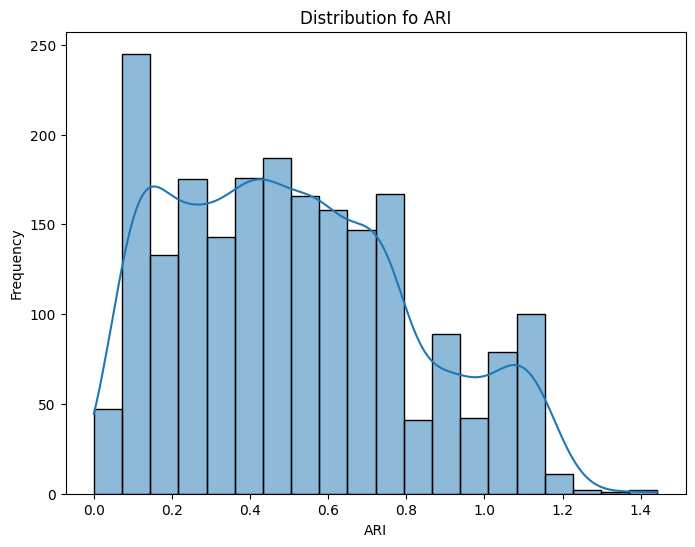

In [123]:
# ARI 분포 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['ARI'], kde=True, bins=20)
plt.title('Distribution fo ARI')
plt.xlabel('ARI')
plt.ylabel('Frequency')
plt.show()

In [124]:
##### ####

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

X = df.drop(['NObeyesdad', 'id'], axis=1) # 종속변수
y = df['NObeyesdad'] # 종속변수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

print("\nSupport Vector Machine:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

print("\nK-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

Logistic Regression:
                     precision    recall  f1-score   support

insufficient_weight       0.80      0.95      0.87        86
      normal_weight       0.69      0.46      0.55        93
     obesity_type_i       0.82      0.77      0.80       102
    obesity_type_ii       0.86      0.97      0.91        88
   obesity_type_iii       0.94      0.99      0.97        98
 overweight_level_i       0.64      0.60      0.62        88
overweight_level_ii       0.62      0.70      0.65        79

           accuracy                           0.78       634
          macro avg       0.77      0.78      0.77       634
       weighted avg       0.77      0.78      0.77       634

Accuracy: 0.7791798107255521

Support Vector Machine:
                     precision    recall  f1-score   support

insufficient_weight       0.83      0.99      0.90        86
      normal_weight       0.89      0.60      0.72        93
     obesity_type_i       0.98      0.95      0.97       102
    ob

In [ ]:
##### ####

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

# 기본 성능 계산
base_model = voting_clf  # Soft Voting 모델 사용
base_model.fit(X_train, y_train)
base_pred = base_model.predict(X_test)
base_recall = recall_score(y_test, base_pred, average='macro')
print(f"Base Recall: {base_recall:.4f}")

# Drop Column Importance 계산
importance_results = {}

for col in X_train.columns:
    # 특정 변수를 제거한 데이터 생성
    X_train_drop = X_train.drop(columns=[col])
    X_test_drop = X_test.drop(columns=[col])

    # 모델 학습 및 평가
    base_model.fit(X_train_drop, y_train)
    drop_pred = base_model.predict(X_test_drop)
    drop_recall = recall_score(y_test, drop_pred, average='macro')

    # 중요도 저장
    importance_results[col] = base_recall - drop_recall  # 올바르게 Recall 차이 계산

# 결과 정렬 및 데이터프레임 생성
importance_df = pd.DataFrame(list(importance_results.items()), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Change in Recall')
plt.ylabel('Feature')
plt.title('Feature Importance (Drop Column Importance)')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
##### #####